### Statement of Problem
To scrape a hotel booking site and build a model that can predict the booking price of each hotel.

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from bs4 import BeautifulSoup # Import for Beautiful Soup
import requests # Import for requests
import lxml # Import for lxml parser
import pandas as pd # Import for Pandas
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
%matplotlib inline

from datetime import date
 
today = date.today() #get todays date
day=today.day 
day=day+1
year=today.year
month=today.month
tom=f'{year}-{month}-{day}' #get tomorrow's date

#getting both todays date and tomorrow's date will ensure that anytime we run the code the check in date will
#be today while the check out time will be tomorrow

#look closely at the url in the main_link to see how the dates are added to the url
main_link=f'https://www.booking.com/searchresults.html?sid=9035488a14dba79b3cf0ff841f1fe27f&checkout={tom}&dest_type=country&sb=1&label=gen173nr-1FCAEoggI46AdIM1gEaGyIAQGYATG4AQfIAQzYAQHoAQH4AQKIAgGoAgO4AvTIm_IFwAIB&aid=356980&ss=Nigeria&src=searchresults&ssne=Nigeria&checkin={today}&lang=en-us&sb_travel_purpose=leisure&src_elem=sb&group_adults=2&no_rooms=1&dest_id=155&ssne_untouched=Nigeria&group_children=0'

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.61 Safari/537.36'}

page = requests.get(main_link, headers=headers)

# We can also check the response code
print(page.status_code) #if the value here is 200, then you have permission to access the site, if it is 400 you won't 
                        #have access

# Make it a soup
soup = BeautifulSoup(page.text,"lxml")

count=int(soup.find_all('h1', class_="e1f827110f d3a14d00da")[0].text[9:-17].replace(",",""))
print(f'there are {count} properties that match this description')  #this will tell us how many properties fit the criteria we selected

Name=[] #property name list
Price_per_night=[] #price per night list
Location=[] #location 
Rating=[]
Classification=[]
No_of_Reviews=[]


for i in range(25):
    names=soup.find_all('div', class_="fcab3ed991 a23c043802")[i].text
    Name.append(names)
    price=soup.find_all('span', class_="fcab3ed991 bd73d13072")[i].text.split()[1]
    Price_per_night.append(price) 
    rate= soup.find_all('div', class_="a1b3f50dcd cbb2d85c33 a1f3ecff04 db7f07f643 d19ba76520 f4e25490ec d02f1578ba d17b3fe5e2")[i].text.split()[0][:3]
    Rating.append(rate)
    if len(soup.find_all('div', class_="a1b3f50dcd cbb2d85c33 a1f3ecff04 db7f07f643 d19ba76520 f4e25490ec d02f1578ba d17b3fe5e2")[i].text.split())==3:
        review=soup.find_all('div', class_="a1b3f50dcd cbb2d85c33 a1f3ecff04 db7f07f643 d19ba76520 f4e25490ec d02f1578ba d17b3fe5e2")[i].text.split()[1]
        classes=soup.find_all('div', class_="a1b3f50dcd cbb2d85c33 a1f3ecff04 db7f07f643 d19ba76520 f4e25490ec d02f1578ba d17b3fe5e2")[i].text.split()[0][3:]
    else:
        review=soup.find_all('div', class_="a1b3f50dcd cbb2d85c33 a1f3ecff04 db7f07f643 d19ba76520 f4e25490ec d02f1578ba d17b3fe5e2")[i].text.split()[2]
        classes=soup.find_all('div', class_="a1b3f50dcd cbb2d85c33 a1f3ecff04 db7f07f643 d19ba76520 f4e25490ec d02f1578ba d17b3fe5e2")[i].text.split()[1]
    No_of_Reviews.append(review)
    Classification.append(classes)

nums=[x for x in range(50) if x%2==0]
for e in nums:
    locate=soup.find_all('span', class_="f4bd0794db b4273d69aa")[e].text
    Location.append(locate)

df=pd.DataFrame({'Name':Name,'Price_per_night':Price_per_night,
              'Location':Location,'Rating':Rating,
              'Classification':Classification,'No_of_Reviews':No_of_Reviews})


df.to_csv('hotels.csv',index=False, encoding='utf-8') #saving the dataset

df.head(10)

200
there are 969 properties that match this description


,Name,Price_per_night,Location,Rating,Classification,No_of_Reviews
0,The Agore Hotels and Suites Ltd,"18,368",Awoyaya,8.0,Good,22
1,3H Villas Boutique Hotel Lekki Phase 1,"45,000",Lekki,9.6,Exceptional,20
2,Swiss International The Vistana,"45,650",Lekki,8.1,Good,61
3,Taverna Lounge & Boutique Hotel,"14,193",Port Harcourt,8.4,Good,119
4,Nigus House Lekki,"38,471",Lekki,8.9,Excellent,18
5,Manuela Residence,"83,363","Victoria Island, Lagos",7.5,Good,26
6,DelMor Shortlet Apartments,"37,350",Lekki,7.0,Good,10
7,mmmHouse,"16,322",Abuja,8.3,Good,51
8,Crest Inn,"73,277",Abuja,8.5,Good,2
9,Exquisitely Luxury 4 unit of 4 bedroom duplex ...,"117,653",Ogoyo,9.0,Wonderful,2


### Importing the dataset

In [4]:
hotel = pd.read_csv('hotels.csv')

In [5]:
hotel.head()

,Name,Price_per_night,Location,Rating,Classification,No_of_Reviews
0,The Agore Hotels and Suites Ltd,"18,368",Awoyaya,8.0,Good,22
1,3H Villas Boutique Hotel Lekki Phase 1,"45,000",Lekki,9.6,Exceptional,20
2,Swiss International The Vistana,"45,650",Lekki,8.1,Good,61
3,Taverna Lounge & Boutique Hotel,"14,193",Port Harcourt,8.4,Good,119
4,Nigus House Lekki,"38,471",Lekki,8.9,Excellent,18


### Data Inspection
When working with any data, one of the key and basic things to do is to inspect the data and observe the data types, missing values, extreme observations(outliers) anomalies which will be the guide in data wrangling

In [6]:
hotel.shape #to check to number of rows and columns

#there are 25 rows and 6 columns

(25, 6)

In [7]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             25 non-null     object
 1   Price_per_night  25 non-null     object
 2   Location         25 non-null     object
 3   Rating           25 non-null     object
 4   Classification   25 non-null     object
 5   No_of_Reviews    25 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


* All the data types are object including price, rating and numner of reviews which are supposed to be number data types.
* There are no missing values

In [8]:
hotel['Location'].value_counts()

Lekki                     5
Kano                      2
Abuja                     2
Port Harcourt             2
Asaba                     2
Ijebu Ode                 1
Ikorodu                   1
Ogoyo                     1
Lagos                     1
Victoria Island, Lagos    1
Enugu                     1
Awoyaya                   1
Oshogbo                   1
Abeokuta                  1
Gidan Nbora               1
Alasia                    1
Amuwo                     1
Name: Location, dtype: int64

In [9]:
hotel['Rating'].unique()

array(['8.0', '9.6', '8.1', '8.4', '8.9', '7.5', '7.0', '8.3', '8.5',
       '9.0', '10E', '6.3', '7.1', '8.2', '7.6', '7.7', '7.2', '7.4',
       '7.8', '6.8', '7.9'], dtype=object)

In [10]:
hotel['Classification'].value_counts()
#Exceptional is recorded in two different ways, xceptional and exceptional
#xceptional will be corrected to exceptional

Good           19
score           2
Excellent       1
Exceptional     1
Wonderful       1
xceptional      1
Name: Classification, dtype: int64

#### Data Wrangling

In [11]:
## Checking for missing values
hotel.isnull().sum()
#there are no missing values

Name               0
Price_per_night    0
Location           0
Rating             0
Classification     0
No_of_Reviews      0
dtype: int64

In [12]:
hotel.dtypes

Name               object
Price_per_night    object
Location           object
Rating             object
Classification     object
No_of_Reviews       int64
dtype: object

Price_per_night,
Ratings
and number of reviews will be corrected to the appropriate data types

In [13]:
hotel['Price_per_night'] = hotel['Price_per_night'].astype(str)
hotel.head()

,Name,Price_per_night,Location,Rating,Classification,No_of_Reviews
0,The Agore Hotels and Suites Ltd,"18,368",Awoyaya,8.0,Good,22
1,3H Villas Boutique Hotel Lekki Phase 1,"45,000",Lekki,9.6,Exceptional,20
2,Swiss International The Vistana,"45,650",Lekki,8.1,Good,61
3,Taverna Lounge & Boutique Hotel,"14,193",Port Harcourt,8.4,Good,119
4,Nigus House Lekki,"38,471",Lekki,8.9,Excellent,18


In [14]:
hotel['Price_per_night'].dtypes

dtype('O')

In [15]:
hotel['Price_per_night'] = hotel['Price_per_night'].str.replace(",", "")

In [16]:
hotel['Price_per_night'] = hotel['Price_per_night'].astype(int)

In [17]:
hotel['Price_per_night'].head()

0    18368
1    45000
2    45650
3    14193
4    38471
Name: Price_per_night, dtype: int32

In [18]:
hotel['No_of_Reviews'] = pd.to_numeric(hotel['No_of_Reviews'], errors = 'coerce')

In [19]:
hotel['No_of_Reviews'].unique()

array([ 22,  20,  61, 119,  18,  26,  10,  51,   2,   1,   9,  35,  48,
        17, 459,  93, 184,  64,  16,   8,  74,  36], dtype=int64)

In [20]:
hotel['Rating'] = pd.to_numeric(hotel['Rating'], errors = 'coerce')

In [21]:
hotel.dtypes

Name                object
Price_per_night      int32
Location            object
Rating             float64
Classification      object
No_of_Reviews        int64
dtype: object

In [22]:
hotel['Rating'].unique()
#the unique observation 10E earlier recorded in Rating has being changed to NaN which 
#will be dealt with later

array([8. , 9.6, 8.1, 8.4, 8.9, 7.5, 7. , 8.3, 8.5, 9. , nan, 6.3, 7.1,
       8.2, 7.6, 7.7, 7.2, 7.4, 7.8, 6.8, 7.9])

In [23]:
hotel.isnull().sum()
#there is one missing value

Name               0
Price_per_night    0
Location           0
Rating             1
Classification     0
No_of_Reviews      0
dtype: int64

In [24]:
hotel.head()

,Name,Price_per_night,Location,Rating,Classification,No_of_Reviews
0,The Agore Hotels and Suites Ltd,18368,Awoyaya,8.0,Good,22
1,3H Villas Boutique Hotel Lekki Phase 1,45000,Lekki,9.6,Exceptional,20
2,Swiss International The Vistana,45650,Lekki,8.1,Good,61
3,Taverna Lounge & Boutique Hotel,14193,Port Harcourt,8.4,Good,119
4,Nigus House Lekki,38471,Lekki,8.9,Excellent,18


In [25]:
hotel['Classification'].unique()

array(['Good', 'Exceptional', 'Excellent', 'Wonderful', 'xceptional',
       'score'], dtype=object)

In [26]:
hotel['Classification'] = hotel['Classification'].replace('xceptional', 'Exceptional')

In [27]:
hotel['Classification'].unique()
#score is not a classification hence it will be converted to a missing value

array(['Good', 'Exceptional', 'Excellent', 'Wonderful', 'score'],
      dtype=object)

In [28]:
hotel['Classification'].replace('score', np.nan, inplace = True)

In [29]:
hotel['Classification'].unique()

array(['Good', 'Exceptional', 'Excellent', 'Wonderful', nan], dtype=object)

In [30]:
hotel['Classification'].unique()

array(['Good', 'Exceptional', 'Excellent', 'Wonderful', nan], dtype=object)

In [31]:
hotel['Classification'].value_counts()

Good           19
Exceptional     2
Excellent       1
Wonderful       1
Name: Classification, dtype: int64

### Dealing with missing values

In [32]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
Price_per_night,25.0,37849.200000,28570.983655,9338.0,16322.0,26975.00,48368.000,117653.0
Rating,24.0,7.783333,0.768209,6.3,7.2,7.75,8.225,9.6
No_of_Reviews,25.0,66.080000,96.628550,1.0,16.0,35.00,74.000,459.0


In [33]:
#the mean and median of rating are abit close, hence mean will be used to fill missing values

hotel['Rating'].fillna(hotel['Rating'].mean(), inplace = True)

In [34]:
hotel.isnull().sum()

Name               0
Price_per_night    0
Location           0
Rating             0
Classification     2
No_of_Reviews      0
dtype: int64

In [35]:
hotel['Classification'].value_counts()

Good           19
Exceptional     2
Excellent       1
Wonderful       1
Name: Classification, dtype: int64

In [36]:
mode = hotel['Classification'].mode()
mode

0    Good
dtype: object

In [37]:
hotel['Classification'].fillna(hotel['Classification'].mode()[0], inplace = True)

In [38]:
hotel.isnull().sum()
#there are no missing values 

Name               0
Price_per_night    0
Location           0
Rating             0
Classification     0
No_of_Reviews      0
dtype: int64

In [39]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
Price_per_night,25.0,37849.200000,28570.983655,9338.0,16322.0,26975.000000,48368.0,117653.0
Rating,25.0,7.783333,0.752034,6.3,7.2,7.783333,8.2,9.6
No_of_Reviews,25.0,66.080000,96.628550,1.0,16.0,35.000000,74.0,459.0


There is disparity between the mean and median of price_per_night which means there is skewness in that variable and since the mean is higher than the median, it mostly likely indicates that is skewed to the right(This will be explored more in the EDA section).

#### Detecting and Dealing with Outliers

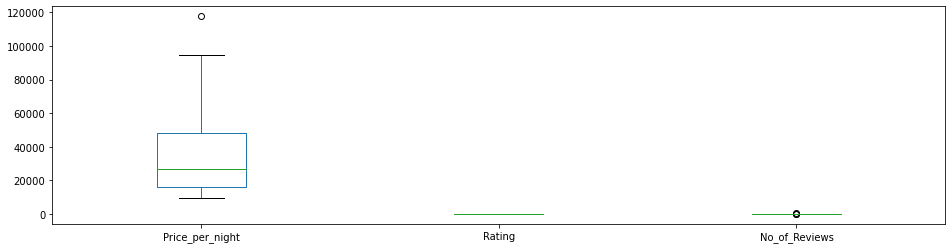

In [40]:
hotel.plot(kind = 'box', figsize = (16, 4))
plt.show();

<AxesSubplot:>

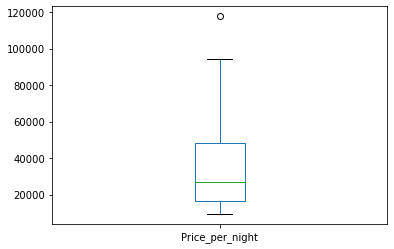

In [41]:
hotel["Price_per_night"].plot(kind = 'box')

In [42]:
outliers = []
a = hotel["Price_per_night"]
def detect_outliers_zscore(a):
    thres = 3
    mean = np.mean(a)
    std = np.std(a)
    # print(mean, std)
    for i in a:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(a)
print("Detected outliers are:", sample_outliers)

Detected outliers are: []


156571 is the only detected outlier in price per night hence will it be replaced with the median.

In [43]:
hotel["Price_per_night"].replace(156571, hotel["Price_per_night"].median(), inplace = True)

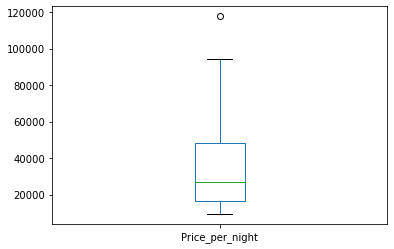

In [44]:
hotel["Price_per_night"].plot(kind = "box");

In [45]:
hotel.columns

Index(['Name', 'Price_per_night', 'Location', 'Rating', 'Classification',
       'No_of_Reviews'],
      dtype='object')

In [46]:
outliers = []
a = hotel['Rating']
def detect_outliers_zscore(a):
    thres = 3
    mean = np.mean(a)
    std = np.std(a)
    # print(mean, std)
    for i in a:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(a)
print("Detected outliers are:", sample_outliers)

Detected outliers are: []


An empty list is returned which indicates there are no extreme observations

#### Exploratory Data Analysis

In [47]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
Price_per_night,25.0,37849.200000,28570.983655,9338.0,16322.0,26975.000000,48368.0,117653.0
Rating,25.0,7.783333,0.752034,6.3,7.2,7.783333,8.2,9.6
No_of_Reviews,25.0,66.080000,96.628550,1.0,16.0,35.000000,74.0,459.0


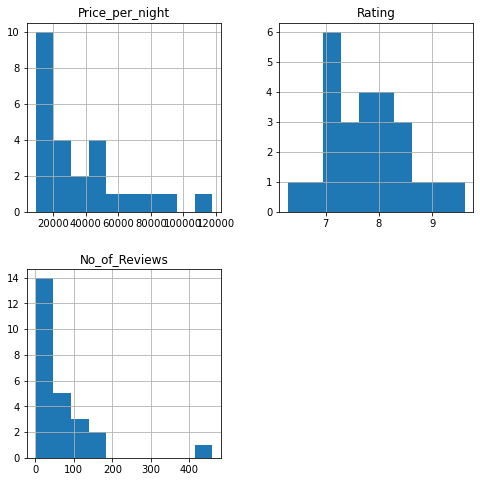

In [48]:
hotel.hist(figsize = (8, 8))
plt.show();

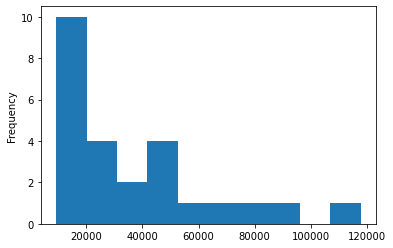

In [49]:
hotel['Price_per_night'].plot(kind = 'hist')
plt.show();

Hotels with price range of 20000 have the highest distribution to 40000 and 60000 and there is a gradual decrease as the price per night increase and between 120000 to 140000 per night, there is observation of point and low distribution in 160000.

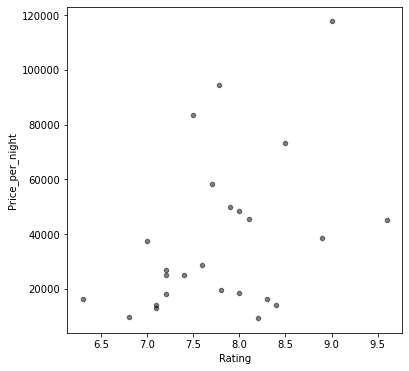

In [50]:
hotel.plot(kind = 'scatter', x = 'Rating', y = 'Price_per_night', alpha = 0.5, 
          color = 'black', figsize = (6, 6));

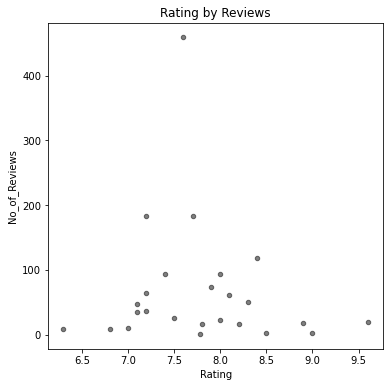

In [51]:
hotel.plot(kind = 'scatter', x = 'Rating', y = 'No_of_Reviews', alpha = 0.5, 
          color = 'black', title = 'Rating by Reviews', figsize = (6, 6));

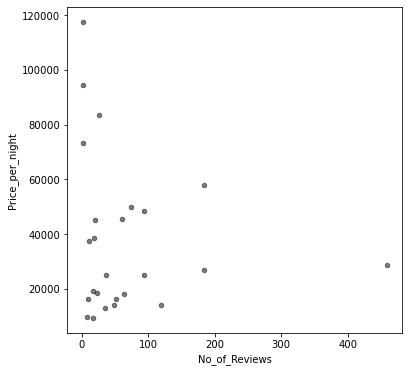

In [52]:
hotel.plot(kind = 'scatter', y = 'Price_per_night', x = 'No_of_Reviews', alpha = 0.5, 
          color = 'black', figsize = (6, 6));

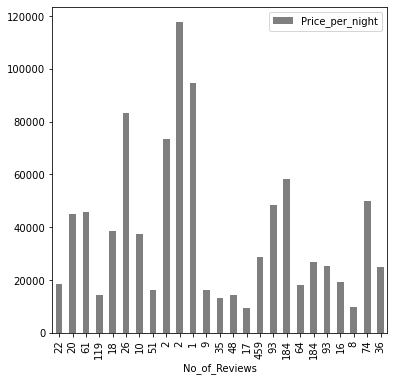

In [53]:
hotel.plot(kind = 'bar', y = 'Price_per_night', x = 'No_of_Reviews', alpha = 0.5, 
          color = 'black', figsize = (6, 6));

### Feature Engineering

In [54]:
West_region = ['Lekki', 'Victoria Island, Lagos', 'Agege', 'Abeokuta', 'Ijebu Ode', 'Awoyaya', 
               'Ogoyo', 'Lagos']
North_region = ['Abuja', 'Jabi', 'Gidan Nbora']
South_region = ['Port Harcourt', 'Asaba']
East_region = ['Enugu', 'Owerri']         

In [55]:
Region = []

for loc in hotel['Location']:
    if loc in West_region:
        Region.append('West')
    elif loc in North_region:
        Region.append('North')
    elif loc in South_region:
        Region.append('South')
    else:
        Region.append('East')

In [56]:
hotel['Region'] = Region

In [57]:
hotel.head()

,Name,Price_per_night,Location,Rating,Classification,No_of_Reviews,Region
0,The Agore Hotels and Suites Ltd,18368,Awoyaya,8.0,Good,22,West
1,3H Villas Boutique Hotel Lekki Phase 1,45000,Lekki,9.6,Exceptional,20,West
2,Swiss International The Vistana,45650,Lekki,8.1,Good,61,West
3,Taverna Lounge & Boutique Hotel,14193,Port Harcourt,8.4,Good,119,South
4,Nigus House Lekki,38471,Lekki,8.9,Excellent,18,West


In [58]:
lagos = ['Lekki', 'Victoria Island, Lagos', 'Agege', 'Lagos', 'Awoyaya', 'Ogoyo']
ogun = ['Ijebu Ode']
fct = ['Abuja', 'Jabi', 'Gidan Nbora']
rivers = ['Port Harcourt']
delta = ['Asaba']
enugu = ['Enugu']
imo = ['Owerri']

In [59]:
State = []

for loc in hotel["Location"]:
    if loc in lagos:
        State.append("Lagos State")
    elif loc in fct:
        State.append("FCT")
    elif loc in rivers:
        State.append('Rivers State')
    elif loc in delta:
        State.append("Delta State")
    elif loc in ogun:
        State.append("Ogun State")
    elif loc in enugu:
        State.append('Enugu State')
    else:
        State.append('Imo State')

In [60]:
hotel['State'] = State
hotel.head()

,Name,Price_per_night,Location,Rating,Classification,No_of_Reviews,Region,State
0,The Agore Hotels and Suites Ltd,18368,Awoyaya,8.0,Good,22,West,Lagos State
1,3H Villas Boutique Hotel Lekki Phase 1,45000,Lekki,9.6,Exceptional,20,West,Lagos State
2,Swiss International The Vistana,45650,Lekki,8.1,Good,61,West,Lagos State
3,Taverna Lounge & Boutique Hotel,14193,Port Harcourt,8.4,Good,119,South,Rivers State
4,Nigus House Lekki,38471,Lekki,8.9,Excellent,18,West,Lagos State


In [61]:
#categorise the price per night into high, moderate and low
hotel['Price Range'] = pd.cut(hotel["Price_per_night"], 3, labels = ['Low', 'Moderate', "High"])
hotel['Price Range']

0          Low
1          Low
2     Moderate
3          Low
4          Low
5         High
6          Low
7          Low
8     Moderate
9         High
10        High
11         Low
12         Low
13         Low
14         Low
15         Low
16    Moderate
17    Moderate
18         Low
19         Low
20         Low
21         Low
22         Low
23    Moderate
24         Low
Name: Price Range, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [62]:
hotel.head()

,Name,Price_per_night,Location,Rating,Classification,No_of_Reviews,Region,State,Price Range
0,The Agore Hotels and Suites Ltd,18368,Awoyaya,8.0,Good,22,West,Lagos State,Low
1,3H Villas Boutique Hotel Lekki Phase 1,45000,Lekki,9.6,Exceptional,20,West,Lagos State,Low
2,Swiss International The Vistana,45650,Lekki,8.1,Good,61,West,Lagos State,Moderate
3,Taverna Lounge & Boutique Hotel,14193,Port Harcourt,8.4,Good,119,South,Rivers State,Low
4,Nigus House Lekki,38471,Lekki,8.9,Excellent,18,West,Lagos State,Low


In [63]:
hotel.drop(['Name','Location'], axis = 1,inplace = True)

#### Feature Importance and Selection

In [64]:
hotel_df = hotel.copy()
hotel_df.head()

,Price_per_night,Rating,Classification,No_of_Reviews,Region,State,Price Range
0,18368,8.0,Good,22,West,Lagos State,Low
1,45000,9.6,Exceptional,20,West,Lagos State,Low
2,45650,8.1,Good,61,West,Lagos State,Moderate
3,14193,8.4,Good,119,South,Rivers State,Low
4,38471,8.9,Excellent,18,West,Lagos State,Low


In [65]:
y = hotel_df['Price_per_night']
y.head()

0    18368
1    45000
2    45650
3    14193
4    38471
Name: Price_per_night, dtype: int32

In [66]:
hotel_df.drop('Price_per_night', axis = 1, inplace = True)

In [67]:
hotel_df.head()

,Rating,Classification,No_of_Reviews,Region,State,Price Range
0,8.0,Good,22,West,Lagos State,Low
1,9.6,Exceptional,20,West,Lagos State,Low
2,8.1,Good,61,West,Lagos State,Moderate
3,8.4,Good,119,South,Rivers State,Low
4,8.9,Excellent,18,West,Lagos State,Low


In [68]:
hotel_df = pd.get_dummies(hotel_df, columns = ['Classification'])
hotel_df.head()

,Rating,No_of_Reviews,Region,State,Price Range,Classification_Excellent,Classification_Exceptional,Classification_Good,Classification_Wonderful
0,8.0,22,West,Lagos State,Low,0,0,1,0
1,9.6,20,West,Lagos State,Low,0,1,0,0
2,8.1,61,West,Lagos State,Moderate,0,0,1,0
3,8.4,119,South,Rivers State,Low,0,0,1,0
4,8.9,18,West,Lagos State,Low,1,0,0,0


In [69]:
hotel_df = pd.get_dummies(hotel_df, columns = ['No_of_Reviews'])
hotel_df.head()

,Rating,Region,State,Price Range,Classification_Excellent,Classification_Exceptional,Classification_Good,Classification_Wonderful,No_of_Reviews_1,No_of_Reviews_2,...,No_of_Reviews_36,No_of_Reviews_48,No_of_Reviews_51,No_of_Reviews_61,No_of_Reviews_64,No_of_Reviews_74,No_of_Reviews_93,No_of_Reviews_119,No_of_Reviews_184,No_of_Reviews_459
0,8.0,West,Lagos State,Low,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.6,West,Lagos State,Low,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,West,Lagos State,Moderate,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,8.4,South,Rivers State,Low,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8.9,West,Lagos State,Low,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
hotel_df = pd.get_dummies(hotel_df, columns = ['Region'])
hotel_df.head()

,Rating,State,Price Range,Classification_Excellent,Classification_Exceptional,Classification_Good,Classification_Wonderful,No_of_Reviews_1,No_of_Reviews_2,No_of_Reviews_8,...,No_of_Reviews_64,No_of_Reviews_74,No_of_Reviews_93,No_of_Reviews_119,No_of_Reviews_184,No_of_Reviews_459,Region_East,Region_North,Region_South,Region_West
0,8.0,Lagos State,Low,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9.6,Lagos State,Low,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.1,Lagos State,Moderate,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8.4,Rivers State,Low,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,8.9,Lagos State,Low,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
hotel_df = pd.get_dummies(hotel_df, columns = ['State'])
hotel_df.head()

,Rating,Price Range,Classification_Excellent,Classification_Exceptional,Classification_Good,Classification_Wonderful,No_of_Reviews_1,No_of_Reviews_2,No_of_Reviews_8,No_of_Reviews_9,...,Region_North,Region_South,Region_West,State_Delta State,State_Enugu State,State_FCT,State_Imo State,State_Lagos State,State_Ogun State,State_Rivers State
0,8.0,Low,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,9.6,Low,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,8.1,Moderate,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,8.4,Low,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,8.9,Low,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [72]:
hotel_df = pd.get_dummies(hotel_df, columns = ['Price Range'])
hotel_df.head()

,Rating,Classification_Excellent,Classification_Exceptional,Classification_Good,Classification_Wonderful,No_of_Reviews_1,No_of_Reviews_2,No_of_Reviews_8,No_of_Reviews_9,No_of_Reviews_10,...,State_Delta State,State_Enugu State,State_FCT,State_Imo State,State_Lagos State,State_Ogun State,State_Rivers State,Price Range_Low,Price Range_Moderate,Price Range_High
0,8.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,9.6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,8.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,8.4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,8.9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [73]:
x = hotel_df.copy()
x.head()

,Rating,Classification_Excellent,Classification_Exceptional,Classification_Good,Classification_Wonderful,No_of_Reviews_1,No_of_Reviews_2,No_of_Reviews_8,No_of_Reviews_9,No_of_Reviews_10,...,State_Delta State,State_Enugu State,State_FCT,State_Imo State,State_Lagos State,State_Ogun State,State_Rivers State,Price Range_Low,Price Range_Moderate,Price Range_High
0,8.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,9.6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,8.1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,8.4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,8.9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [74]:
print(x.shape, y.shape)

(25, 41) (25,)


In [75]:
feature_names = x.columns
feature_names

Index(['Rating', 'Classification_Excellent', 'Classification_Exceptional',
       'Classification_Good', 'Classification_Wonderful', 'No_of_Reviews_1',
       'No_of_Reviews_2', 'No_of_Reviews_8', 'No_of_Reviews_9',
       'No_of_Reviews_10', 'No_of_Reviews_16', 'No_of_Reviews_17',
       'No_of_Reviews_18', 'No_of_Reviews_20', 'No_of_Reviews_22',
       'No_of_Reviews_26', 'No_of_Reviews_35', 'No_of_Reviews_36',
       'No_of_Reviews_48', 'No_of_Reviews_51', 'No_of_Reviews_61',
       'No_of_Reviews_64', 'No_of_Reviews_74', 'No_of_Reviews_93',
       'No_of_Reviews_119', 'No_of_Reviews_184', 'No_of_Reviews_459',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'State_Delta State', 'State_Enugu State', 'State_FCT',
       'State_Imo State', 'State_Lagos State', 'State_Ogun State',
       'State_Rivers State', 'Price Range_Low', 'Price Range_Moderate',
       'Price Range_High'],
      dtype='object')

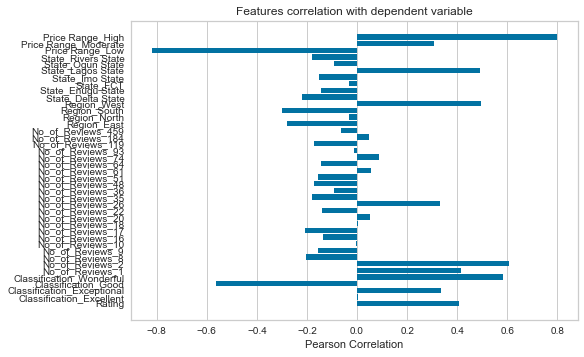

In [76]:
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(labels = feature_names, method = 'pearson')
visualizer.fit(x, y)
visualizer.poof();

In [77]:
score_df = pd.DataFrame({"feature_names" : visualizer.features_,
                        "scores" : visualizer.scores_})
score_df

,feature_names,scores
0,Rating,0.408866
1,Classification_Excellent,0.004534
2,Classification_Exceptional,0.336020
3,Classification_Good,-0.562127
4,Classification_Wonderful,0.581912
5,No_of_Reviews_1,0.413056
6,No_of_Reviews_2,0.606921
7,No_of_Reviews_8,-0.205178
8,No_of_Reviews_9,-0.157912
9,No_of_Reviews_10,-0.003640


Most of the features have low correlation to the label(price per night) except for features such as Number of Reviews_2(those with 2 reviews), high price range, hotels with wonderful classification and moderate price range have moderate correlation(within the range of 0.5 to 0.6). Price low has the highest correlation, though a negative correlation, hotels with good classification also have a moderate negative correlation.

#### Feature Importance: 
The features that are deemed important in predicting the label will be retained and others dropped not deemed as such using the value **0.006 as the mark**, thus any feature with an importance value less than that will be dropped.

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, random_state = 0)

In [79]:
rf.fit(x, y)

RandomForestRegressor(max_depth=3, random_state=0)

In [80]:
feature_importance = pd.DataFrame(rf.feature_importances_,
                          index = x.columns,
                          columns = ["importance"])#.sort_values("importance", ascending = False)
feature_importance

,importance
Rating,0.042874
Classification_Excellent,0.000803
Classification_Exceptional,0.004158
Classification_Good,0.026053
Classification_Wonderful,0.015375
No_of_Reviews_1,0.002915
No_of_Reviews_2,0.044771
No_of_Reviews_8,0.000332
No_of_Reviews_9,0.000000
No_of_Reviews_10,0.002865


In [81]:
X = x[['Region_West', 'Price Range_Low', 'Price Range_Moderate', 'Price Range_High',
             'Region_West', 'State_Imo State', 'State_Lagos State', 'No_of_Reviews_184', 
             'No_of_Reviews_93', 'No_of_Reviews_2', 'Classification_Good', 
             'Classification_Wonderful', 'Rating']]


In [82]:
X.head()

,Region_West,Price Range_Low,Price Range_Moderate,Price Range_High,Region_West,State_Imo State,State_Lagos State,No_of_Reviews_184,No_of_Reviews_93,No_of_Reviews_2,Classification_Good,Classification_Wonderful,Rating
0,1,1,0,0,1,0,1,0,0,0,1,0,8.0
1,1,1,0,0,1,0,1,0,0,0,0,0,9.6
2,1,0,1,0,1,0,1,0,0,0,1,0,8.1
3,0,1,0,0,0,0,0,0,0,0,1,0,8.4
4,1,1,0,0,1,0,1,0,0,0,0,0,8.9


#### Feature Scaling

In [83]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Region_West,25.0,0.440000,0.506623,0.0,0.0,0.000000,1.0,1.0
Price Range_Low,25.0,0.680000,0.476095,0.0,0.0,1.000000,1.0,1.0
Price Range_Moderate,25.0,0.200000,0.408248,0.0,0.0,0.000000,0.0,1.0
Price Range_High,25.0,0.120000,0.331662,0.0,0.0,0.000000,0.0,1.0
Region_West,25.0,0.440000,0.506623,0.0,0.0,0.000000,1.0,1.0
State_Imo State,25.0,0.280000,0.458258,0.0,0.0,0.000000,1.0,1.0
State_Lagos State,25.0,0.360000,0.489898,0.0,0.0,0.000000,1.0,1.0
No_of_Reviews_184,25.0,0.080000,0.276887,0.0,0.0,0.000000,0.0,1.0
No_of_Reviews_93,25.0,0.080000,0.276887,0.0,0.0,0.000000,0.0,1.0
No_of_Reviews_2,25.0,0.080000,0.276887,0.0,0.0,0.000000,0.0,1.0


The values(particularly the mean and median) have a wide range hence they will be scaled so the model can perform better

In [84]:
import sklearn
from sklearn.model_selection import train_test_split #algorithm to split dataset

from sklearn.metrics import mean_squared_error # importing the evaluation metrics 


from sklearn.preprocessing import StandardScaler

In [85]:
col = X.columns
col

Index(['Region_West', 'Price Range_Low', 'Price Range_Moderate',
       'Price Range_High', 'Region_West', 'State_Imo State',
       'State_Lagos State', 'No_of_Reviews_184', 'No_of_Reviews_93',
       'No_of_Reviews_2', 'Classification_Good', 'Classification_Wonderful',
       'Rating'],
      dtype='object')

In [86]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [88]:
print(X_train.shape, y_train.shape)

(18, 13) (18,)


In [89]:
print(X_test.shape, y_test.shape)

(7, 13) (7,)


#### Linear Regression Model

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_train_predlr = linear_regression.predict(X_train)
y_predlr = linear_regression.predict(X_test)

print('Train r2 score: ', r2_score(y_train,y_train_predlr))
print('Test r2 score: ', r2_score(y_test, y_predlr))

train_rmse1 = mean_squared_error(y_train_predlr, y_train, squared= False)
test_rmse1 = mean_squared_error(y_predlr, y_test, squared= False)

#train_rmse1 = np.sqrt(train_mse1)
#test_rmse1 = np.sqrt(test_mse1)

print('Train MSE: %.2f' % train_rmse1)
print('Test MSE: %.2f' % test_rmse1)


NameError: name 'r2_score' is not defined

#### Adaptive Boost Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor #import the model algorithm

adaboost_reg = AdaBoostRegressor(n_estimators = 100, learning_rate = 1.0, 
                             random_state = 0) #setting the hyperparameters

adaboost_model = adaboost_reg.fit(X_train, y_train) ##Training model

print("Training score is:",  adaboost_model.score(X_train, y_train)) #checking accuracy of model

In [ ]:
#predicting the test data 

y_ada_pred = adaboost_reg.predict(X_test)

In [ ]:
#Evaluating the model
import math

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

print("Testing score is : ", r2_score(y_test, y_ada_pred))

rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_ada_pred))

print("RMSE is", rmse)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=3)

decision_tree.fit(X_train, y_train)

In [ ]:
y_train_predd3 = decision_tree.predict(X_train)
y_predd3 = decision_tree.predict(X_test)

print('Train r2 score: ', r2_score(y_train, y_train_predd3))
print('Test r2 score: ', r2_score(y_test, y_predd3))

train_rmsed3 = mean_squared_error(y_train_predd3, y_train,squared=False)
test_rmsed3 = mean_squared_error(y_predd3, y_test,squared=False)

range_train=max(y_train_predd3)-min(y_train_predd3)
normalised_traind3 = train_rmsed3/range_train

range_test=max(y_predd3)-min(y_predd3)
normalised_testd3 = test_rmsed3/range_test

print('Train RMSE: %.2f' % train_rmsed3)
print('Test RMSE: %.2f' % test_rmsed3)
print('RMSE pcttrain: %.2f' % normalised_traind3)
print('RMSE pcttest: %.2f' % normalised_testd3)

The adaboost will be selected since it has the least RMSE(9305) and highest testing accuracy(0.90)

In [ ]:
import pickle

In [ ]:
filename = 'adaboost_model.sav'
pickle.dump(adaboost_reg, open(filename, 'wb'))